In [1]:
library(plyr)
library(ggplot2)
load('clustering_X2_X1.Rdata')

In [2]:
theme_settings = theme_bw() + 
  theme(panel.grid = element_blank(), 
        text=element_text(size=15), 
        plot.title = element_text(hjust = 0.5),
        legend.background=element_blank(),
        legend.key=element_blank(), 
        legend.key.height=unit(1, 'cm'),
        strip.background = element_blank(),
        legend.position = 'bottom')

In [3]:
N2 = 44
SIG = 0.3200759
baseline = sqrt(qchisq(p = 0.95, df = N2) / N2) * SIG

In [4]:
adaptive = ddply(summary_adaptive_single, .(b, s, lam1Type, method, design), summarise, 
              r = mean(r), coverage = mean(coverage))
Stein_vol = ddply(summary_volume_stein_single, .(b, s, lam1Type, method, design), summarise, 
                         r = mean(exp(logVol / N2)), coverage = mean(coverage))
Stein_radius = ddply(summary_radius_stein_single, .(b, s, lam1Type, method, design), summarise, 
                            r = mean(exp(logVol / N2)), coverage = mean(coverage))
dataset1 = rbind(adaptive, Stein_vol)
dataset1$method[dataset1$method == 'twoStepSteinVolume'] = 'two-step stein'
dataset1$method = factor(dataset1$method, levels = c('adaptive', 'two-step stein'))
dataset1$lam1Type = factor(dataset1$lam1Type, levels = c('val', 'cv', '1se'))

Stein_vol['c'] = 'vol'
Stein_radius['c'] = 'radius'
dataset2 = rbind(Stein_vol, Stein_radius)
dataset2$method[dataset2$method == 'twoStepSteinVolume'] = 'two-step stein (volume)'
dataset2$method[dataset2$method == 'twoStepSteinRadius'] = 'two-step stein (diameter)'
dataset2$method = factor(dataset2$method, levels = c('two-step stein (volume)', 'two-step stein (diameter)'))
dataset2$lam1Type = factor(dataset2$lam1Type, levels = c('val', 'cv', '1se'))

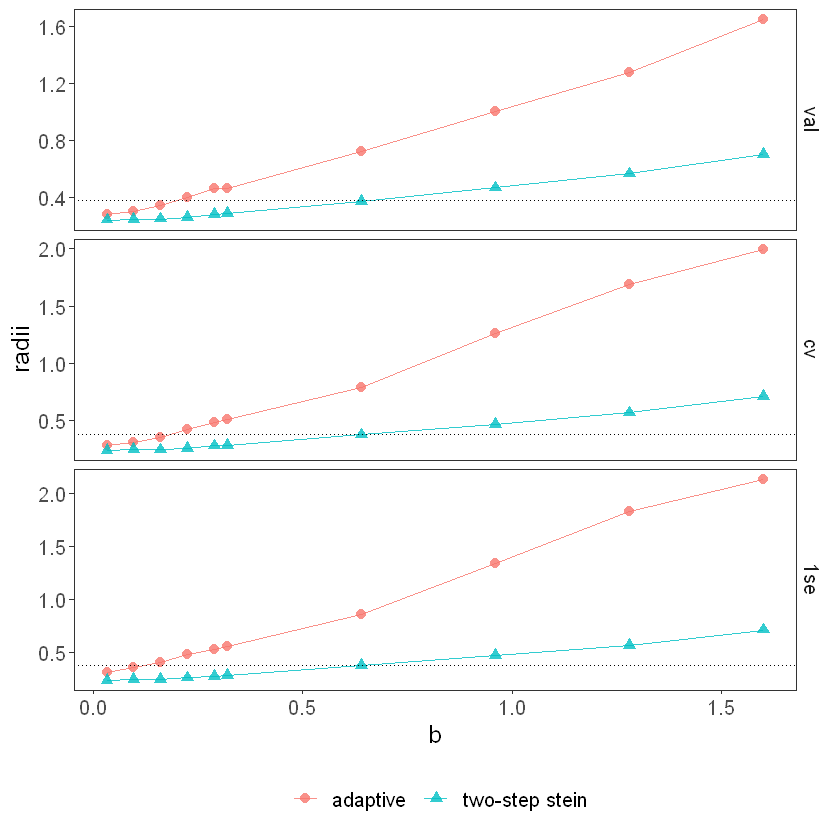

In [5]:
ggplot(data = dataset1, aes(x = b, y = r, color = method, shape = method)) + 
  geom_line(size = 0.5, alpha = 0.8) +
  geom_point(size = 2.5, alpha = 0.8) +
  geom_hline(yintercept = baseline, linetype = 3) +
  scale_color_discrete(name = element_blank()) +
  scale_shape_discrete(name = element_blank()) +
  facet_grid(lam1Type ~ ., scales="free_y") + 
  ylab('radii') + 
  theme_settings

# ggsave('r_single_A_X27_X44.pdf', width = 6.67, height = 6.67, units = 'in')

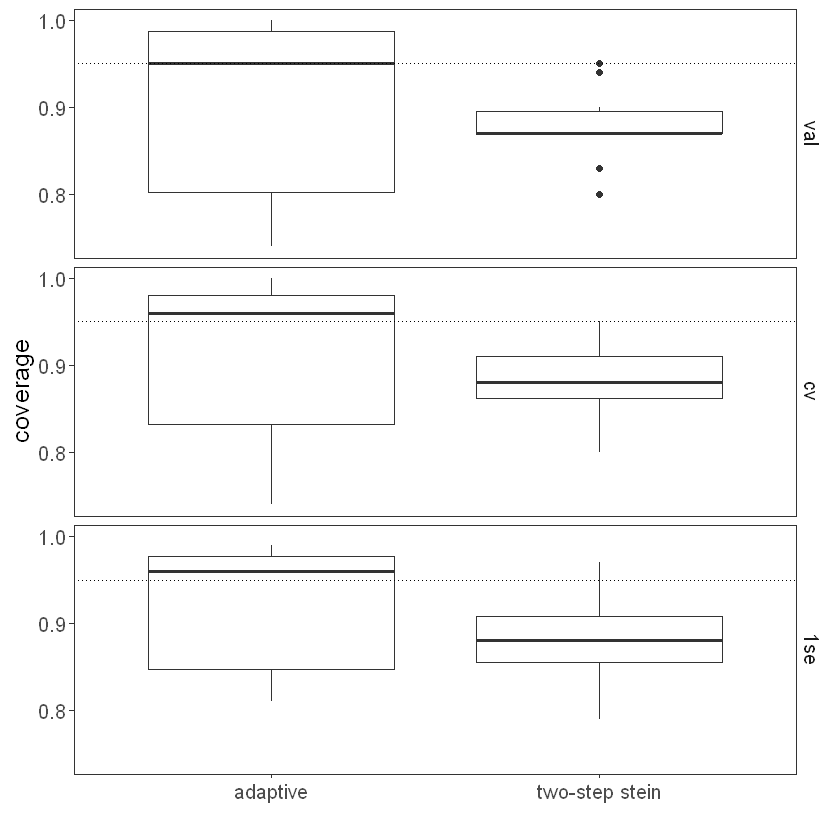

In [6]:
ggplot(data = dataset1, aes(x = method, y = coverage)) + 
  geom_boxplot() + 
  xlab('') + 
  theme_settings +
#   coord_cartesian(ylim = c(0.75, 1)) +
  facet_grid(lam1Type~.) + 
  geom_hline(yintercept = 0.95, linetype = 3)

# ggsave('coverage2_single_A_X27_X44.pdf', width = 6.67, height = 6.67, units = 'in')

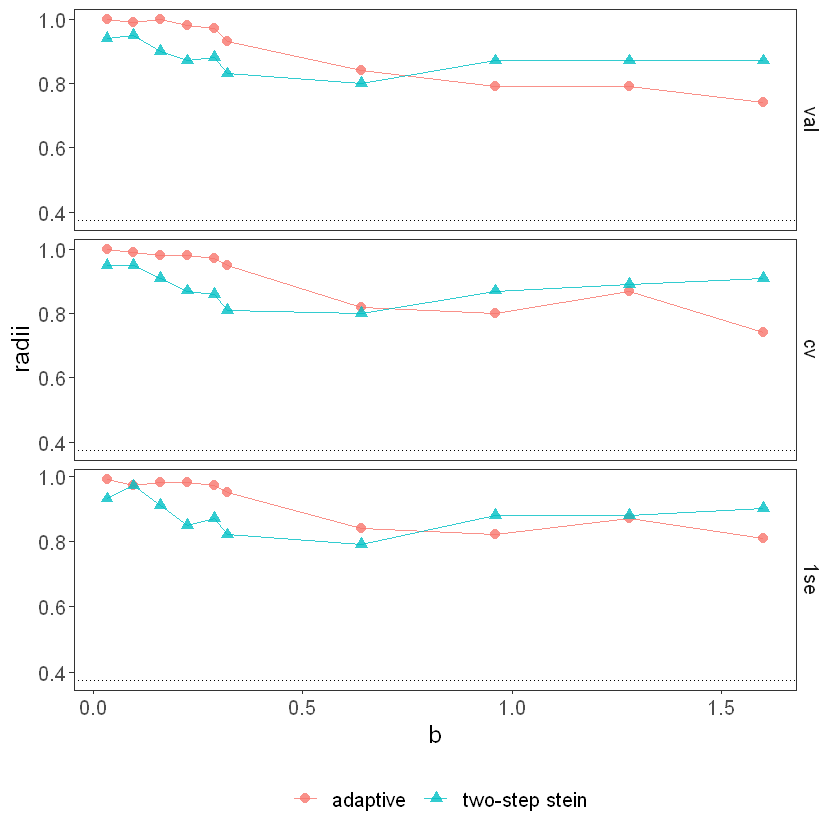

In [8]:
ggplot(data = dataset1, aes(x = b, y = coverage, color = method, shape = method)) + 
  geom_line(size = 0.5, alpha = 0.8) +
  geom_point(size = 2.5, alpha = 0.8) +
  geom_hline(yintercept = baseline, linetype = 3) +
  scale_color_discrete(name = element_blank()) +
  scale_shape_discrete(name = element_blank()) +
  facet_grid(lam1Type ~ ., scales="free_y") + 
  ylab('radii') + 
  theme_settings

ggsave('coverage_line_single_A_X27_X44.pdf', width = 6.67, height = 6.67, units = 'in')

In [5]:
ddply(summary_adaptive_single[summary_adaptive_single$b <= SIG, ], .(s, lam1Type, method, design), summarise, 
              r = mean(r), coverage = mean(coverage), hsigma = mean(hsigma))

s,lam1Type,method,design,r,coverage,hsigma
<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>
14,1se,adaptive,clustering,0.4392584,0.9733333,0.2914362
14,cv,adaptive,clustering,0.3900921,0.9783333,0.2914362
14,val,adaptive,clustering,0.3724730,0.9783333,0.2914362


In [7]:
ddply(summary_volume_stein_single[summary_volume_stein_single$b <= SIG, ], .(s, lam1Type, method, design), summarise, 
                         r = mean(exp(logVol / N2)), coverage = mean(coverage), hsigma = mean(hsigma), r_s = mean(r_s),
     r_w = mean(r_w))

s,lam1Type,method,design,r,coverage,hsigma,r_s,r_w
<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
14,1se,twoStepSteinVolume,clustering,0.2560704,0.8916667,0.2914362,0.2905099,0.2550817
14,cv,twoStepSteinVolume,clustering,0.2584537,0.8916667,0.2914362,0.3123683,0.2560234
14,val,twoStepSteinVolume,clustering,0.2582016,0.8950000,0.2914362,0.3622105,0.2511059


In [10]:
mean(summary_volume_stein_single$k)

[1] 3.232667